In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
test_data = pd.read_csv('../data/raw/mnist_test.csv')
X_test = test_data.iloc[:, 1:].values / 255.0
y_test = test_data.iloc[:, 0].values

X_test = X_test.reshape(-1, 28, 28, 1)

In [3]:
model = load_model('../model/cnn_model.h5')

In [4]:
# Make Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [5]:
#Print Classification Report
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [6]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

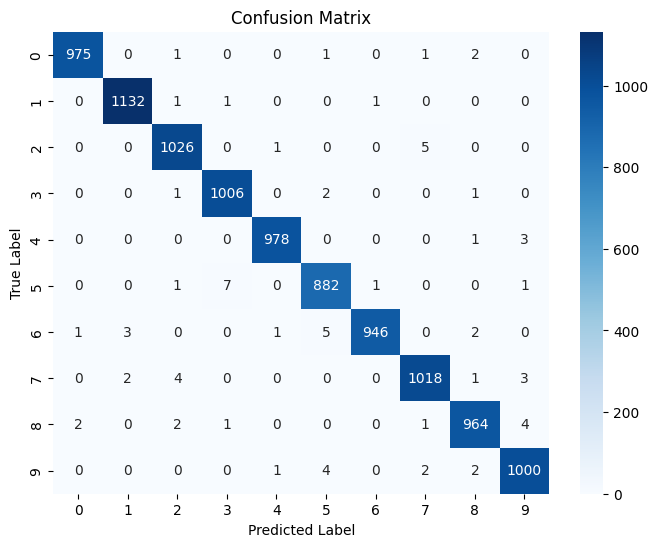

In [7]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
